<a href="https://colab.research.google.com/github/joaotinti75/Machine-Learning/blob/main/Exercicio_Caes_Gatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as bibliotecas

In [1]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Visão Computacional Guia Completo-20230201T234050Z-001/Visão Computacional Guia Completo/Datasets/cat_dog_1.zip'
zip_object = zipfile.ZipFile(file = path, mode='r')

zip_object.extractall('./')
zip_object.close()

In [4]:
diretorio_treino = '/content/cat_dog_1/train'
diretorio_teste = '/content/cat_dog_1/test'

arquivos_treino = [os.path.join(diretorio_treino, f) for f in sorted(os.listdir(diretorio_treino))] 
arquivos_teste = [os.path.join(diretorio_teste, f) for f in sorted(os.listdir(diretorio_teste))] 

print('Número de imagens de treino: ', len(arquivos_treino)) 
print('Número de imagens de teste: ', len(arquivos_teste))

Número de imagens de treino:  4000
Número de imagens de teste:  1000


In [5]:
imagens_treino = []
classes_treino = []

imagens_teste = []
classes_teste = []

In [6]:
largura, altura = 128, 128 #redimensionando as imagens

In [7]:
for imagem_caminho in arquivos_treino:
  if 'dog.' in imagem_caminho:
    classes_treino.append(1)
  else:
    classes_treino.append(0)
  
  imagem = cv2.imread(imagem_caminho)
  imagem = cv2.resize(imagem, (largura, altura))
  imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

  imagem = imagem.ravel() #transformando a matriz de imagem em um vetor
  imagens_treino.append(imagem)


for imagem_caminho in arquivos_teste:
  if 'dog.' in imagem_caminho:
    classes_teste.append(1)
  else:
    classes_teste.append(0)
  
  imagem = cv2.imread(imagem_caminho)
  imagem = cv2.resize(imagem, (largura, altura))
  imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

  imagem = imagem.ravel() #transformando a matriz de imagem em um vetor
  imagens_teste.append(imagem)


Conjunto de imagens de treino
0 = gato, 1 = cachorro
Classe da imagem: 1


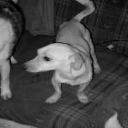

In [8]:
indice_imagem = 3800
print('Conjunto de imagens de treino')
print('0 = gato, 1 = cachorro')
print('Classe da imagem: '+str(classes_treino[indice_imagem]))
cv2_imshow(imagens_treino[indice_imagem].reshape(128,128))

Conjunto de imagens de teste
0 = gato, 1 = cachorro
Classe da imagem: 0


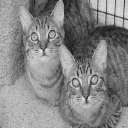

In [9]:
indice_imagem = 400
print('Conjunto de imagens de teste')
print('0 = gato, 1 = cachorro')
print('Classe da imagem: '+str(classes_teste[indice_imagem]))
cv2_imshow(imagens_teste[indice_imagem].reshape(128,128))

In [10]:
print(type(imagens_treino), type(classes_treino))
print(type(imagens_teste), type(imagens_teste))

<class 'list'> <class 'list'>
<class 'list'> <class 'list'>


In [11]:
X_treino = np.asarray(imagens_treino)
y_treino = np.asarray(classes_treino)

X_teste = np.asarray(imagens_teste) 
y_teste = np.asarray(classes_teste)

In [12]:
print(type(X_treino), type(y_treino))
print(type(X_teste), type(y_teste))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [13]:
largura * altura #numero de pixels das imagens redimensionadas

16384

In [14]:
X_treino.shape, y_treino.shape

((4000, 16384), (4000,))

In [15]:
X_teste.shape, y_teste.shape

((1000, 16384), (1000,))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


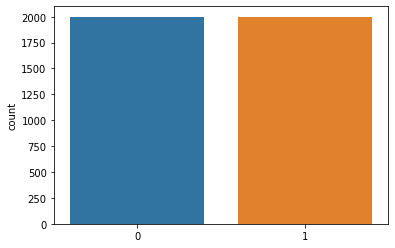

In [16]:
sns.countplot(y_treino); #Quantidade de imagens de acordo com a classe

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


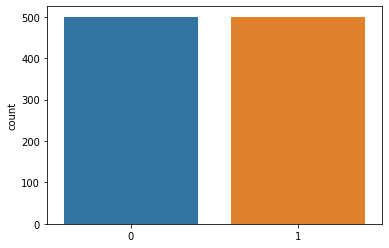

In [17]:
sns.countplot(y_teste)

In [18]:
np.unique(y_treino, return_counts=True) #número de imagens de treino

(array([0, 1]), array([2000, 2000]))

In [19]:
np.unique(y_teste, return_counts=True) #número de imagens de teste

(array([0, 1]), array([500, 500]))

## Normalizando o conjunto X de treino e teste

In [20]:
print(X_treino[0].max(), X_treino[0].min())
print(X_teste[0].max(), X_teste[0].min())

236 1
255 0


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = np.concatenate((X_treino, X_teste), axis=0) #concatenando ambos os conjuntos X de treino e teste para realizar a normalização
scaler.fit(X)

X_treino = scaler.transform(X_treino)
X_teste = scaler.transform(X_teste)

In [22]:
print(X_treino[0], X_treino[0].max())

[0.65490196 0.67843137 0.68235294 ... 0.00784314 0.00784314 0.00784314] 0.9254901960784314


In [23]:
print(X_teste[0], X_teste[0].max())

[0.81960784 0.74901961 0.80784314 ... 0.92156863 0.94901961 0.94901961] 1.0


## Construção da rede neural

In [24]:
#Número de neurônios na 1° camada oculta:
(16384 + 2) / 2

8193.0

In [25]:
network1 = tf.keras.models.Sequential()
network1.add(tf.keras.layers.Dense(input_shape=(16384,), units=8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units=8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [26]:
network1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


In [27]:
network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
historico = network1.fit(X_treino, y_treino, epochs=100)

Epoch 1/100
125/125 [==============================] - 8s 46ms/step - loss: 6.4065 - accuracy: 0.5285
Epoch 2/100
125/125 [==============================] - 6s 45ms/step - loss: 0.6988 - accuracy: 0.5268
Epoch 3/100
125/125 [==============================] - 6s 45ms/step - loss: 0.6979 - accuracy: 0.5320
Epoch 4/100
125/125 [==============================] - 6s 45ms/step - loss: 0.6845 - accuracy: 0.5638
Epoch 5/100
125/125 [==============================] - 6s 45ms/step - loss: 0.6836 - accuracy: 0.5502
Epoch 6/100
125/125 [==============================] - 6s 45ms/step - loss: 0.6877 - accuracy: 0.5305
Epoch 7/100
125/125 [==============================] - 6s 45ms/step - loss: 0.6813 - accuracy: 0.5602
Epoch 8/100
125/125 [==============================] - 6s 45ms/step - loss: 0.6780 - accuracy: 0.5627
Epoch 9/100
125/125 [==============================] - 6s 45ms/step - loss: 0.6805 - accuracy: 0.5663
Epoch 10/100
125/125 [==============================] - 6s 45ms/step - loss: 0.679

In [30]:
historico.history.keys()

dict_keys(['loss', 'accuracy'])

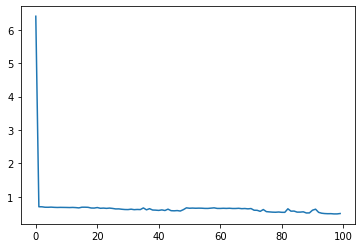

In [31]:
plt.plot(historico.history['loss']);

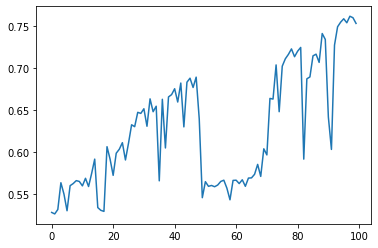

In [32]:
plt.plot(historico.history['accuracy'])

In [33]:
previsoes = network1.predict(X_teste)
previsoes

32/32 [==============================] - 0s 7ms/step


array([[6.87546253e-01],
       [6.00707233e-01],
       [6.90471768e-01],
       [6.18799329e-01],
       [6.90471768e-01],
       [6.90471768e-01],
       [6.90471768e-01],
       [6.90471768e-01],
       [6.43917680e-01],
       [5.35718891e-09],
       [4.39308174e-02],
       [4.15262878e-01],
       [6.90471768e-01],
       [6.90471768e-01],
       [6.90471768e-01],
       [6.90471768e-01],
       [6.90471768e-01],
       [6.90471768e-01],
       [6.44810140e-01],
       [6.90471768e-01],
       [6.90471768e-01],
       [4.22054604e-02],
       [1.30771412e-04],
       [6.90471768e-01],
       [6.90471768e-01],
       [6.89343989e-01],
       [6.90471768e-01],
       [6.90471768e-01],
       [5.69641471e-01],
       [5.41542411e-01],
       [6.90471768e-01],
       [6.90471768e-01],
       [5.45961993e-05],
       [4.49209921e-02],
       [6.90471768e-01],
       [2.51227990e-02],
       [6.90471768e-01],
       [6.90471768e-01],
       [2.31263228e-02],
       [1.30957261e-01],


In [35]:
previsoes = (previsoes > 0.5) #maior que 0.5 é a classe dog
previsoes

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_teste, previsoes)

0.546

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, previsoes)
cm

array([[162, 338],
       [116, 384]])

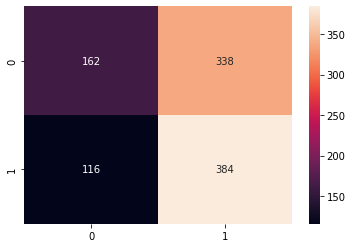

In [43]:
sns.heatmap(cm, annot=True, fmt='g');

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.58      0.32      0.42       500
           1       0.53      0.77      0.63       500

    accuracy                           0.55      1000
   macro avg       0.56      0.55      0.52      1000
weighted avg       0.56      0.55      0.52      1000



## Salvando a rede neural

In [45]:
model_json = network1.to_json()
with open('network1.json', 'w') as json_file:
  json_file.write(model_json)
     

In [46]:
from keras.models import save_model
network1_saved = save_model(network1, 'weights1.hdf5')